In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def new_dataset(name):
    return pd.read_csv('data/'+name, header=None).T

In [3]:
df1 = new_dataset('glucose_data_1.csv')
df2 = new_dataset('glucose_data_2.csv')

In [4]:
def plot_glucose_ts(df, color='b', alpha=1):
    t = np.arange(df.shape[0])
    for i in range(df.shape[1]):
        plt.plot(t, df.values[:,i], c=color, alpha=alpha)
        
def plot_hist(df, alpha=0.3, color='b', intr=(0,60)):
    df.hist(alpha=alpha, color=color, bins=np.linspace(intr[0], intr[1], 30))

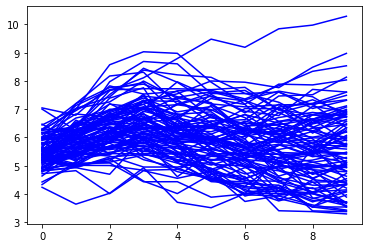

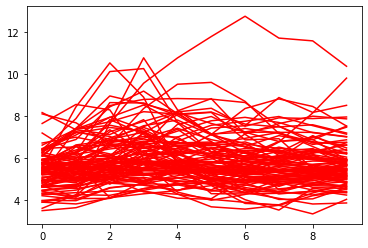

In [5]:
plot_glucose_ts(df1)
plt.show()
plot_glucose_ts(df2, color='r')
plt.show()

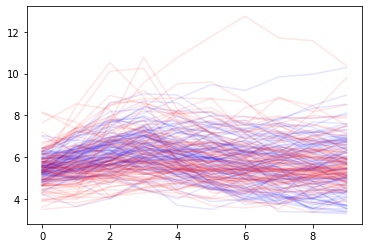

In [6]:
plot_glucose_ts(df1, alpha=0.1)
plot_glucose_ts(df2, alpha=0.1, color='r')
plt.show()

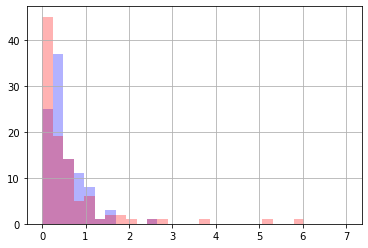

In [7]:
plot_hist(df1.var(), intr=(0,7))
plot_hist(df2.var(), color='r', intr=(0,7))

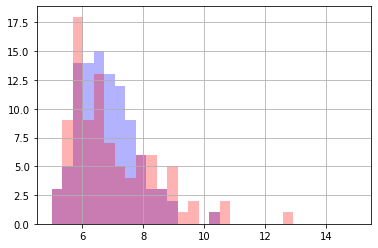

In [8]:
plot_hist(df1.max(), intr=(5, 15))
plot_hist(df2.max(), color='r', intr=(5, 15))

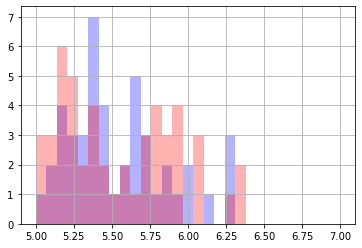

In [9]:
plot_hist(df1.min(), intr=(5, 7))
plot_hist(df2.min(), color='r', intr=(5, 7))

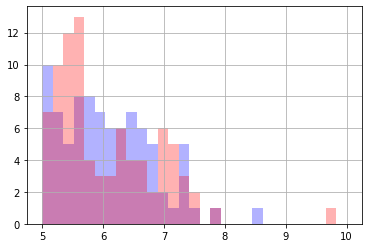

In [10]:
plot_hist(df1.mean(), intr=(5, 10))
plot_hist(df2.mean(), color='r', intr=(5, 10))

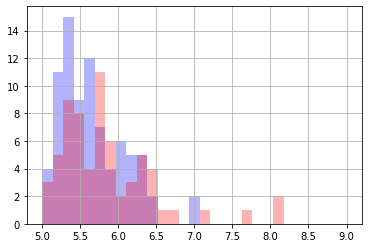

In [11]:
plot_hist(df1.T[0], intr=(5, 9))
plot_hist(df2.T[0], color='r', intr=(5, 9))

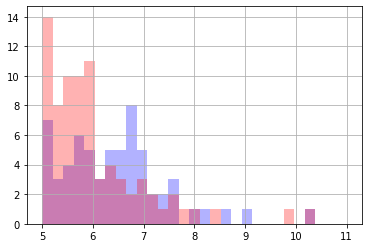

In [12]:
plot_hist(df1.T[9], intr=(5, 11))
plot_hist(df2.T[9], color='r', intr=(5, 11))

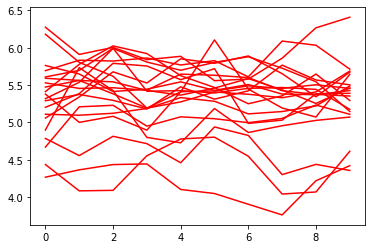

In [13]:
plot_glucose_ts(df2.loc[:,df2.var()<0.1], alpha=1, color='r')

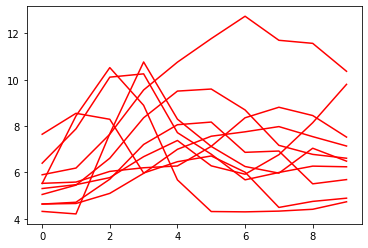

In [14]:
plot_glucose_ts(df2.loc[:,df2.var()>1.5], alpha=1, color='r')

In [15]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
kernel = RBF(length_scale_bounds=(1e-08, 10)) + WhiteKernel(noise_level=0.4, noise_level_bounds='fixed')
gpr = GaussianProcessRegressor(kernel=kernel,normalize_y=False)
t = np.arange(10).reshape(-1,1)

In [16]:
def smoothness(df):
    lengthscales = []
    for i in range(df.shape[1]):
        gpr.fit(t, df[i].values-df[i].values.mean())
        lengthscales.append(gpr.kernel_.get_params()['k1__length_scale'])
    return np.array(lengthscales)

In [17]:
%%capture 
# lengthscale tends to infinity when noise parameter explains all variation, I don't care about that error here
smooth1 = smoothness(df1)
smooth2 = smoothness(df2)

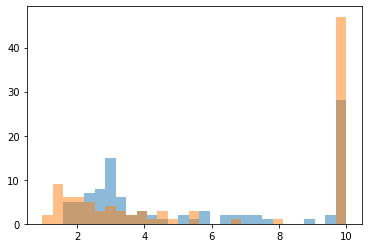

In [18]:
bins = np.linspace(min((min(smooth1), min(smooth2))), max((max(smooth1), max(smooth2))), 30)
plt.hist(smooth1, alpha=0.5, bins=bins)
plt.hist(smooth2, alpha=0.5, bins=bins)
plt.show()

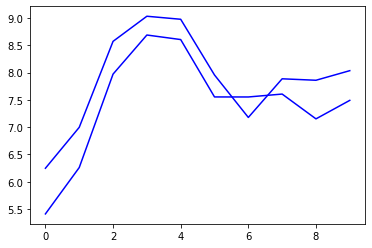

In [19]:
threshold = 1.7
mask = smooth1<threshold
plot_glucose_ts(df1.loc[:,mask])
plt.show()

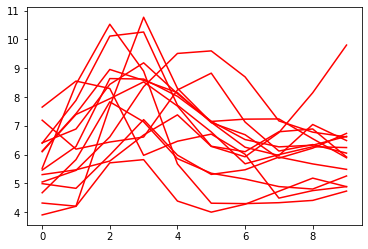

In [20]:
mask = smooth2<threshold
plot_glucose_ts(df2.loc[:,mask], color='r')
plt.show()